# Relaxed Solver for Dynamic Unbalanced Optimal Transport

In this notebook, we check the behavior of `dynamic_wfr_relaxed_grid` function which solves the unbalanced dynamic OT problem on a rectangular grid.

In [1]:
# Import relevant libraries
import sys
import torch
sys.path.append('../relaxed')
from dynamic_wfr_relaxed import dynamic_wfr_relaxed_grid
import numpy as np
import matplotlib.pyplot as plt

## Example 1: Scaling of the uniform distribution

Expected solution:
$\begin{align} \textrm{WFR}_1 &= \sqrt{2} \tag*{} \\ \rho &= (t+1)^2 \rho_0 \otimes dt \tag*{} \end{align}$


WFR distance: tensor(1.4566)


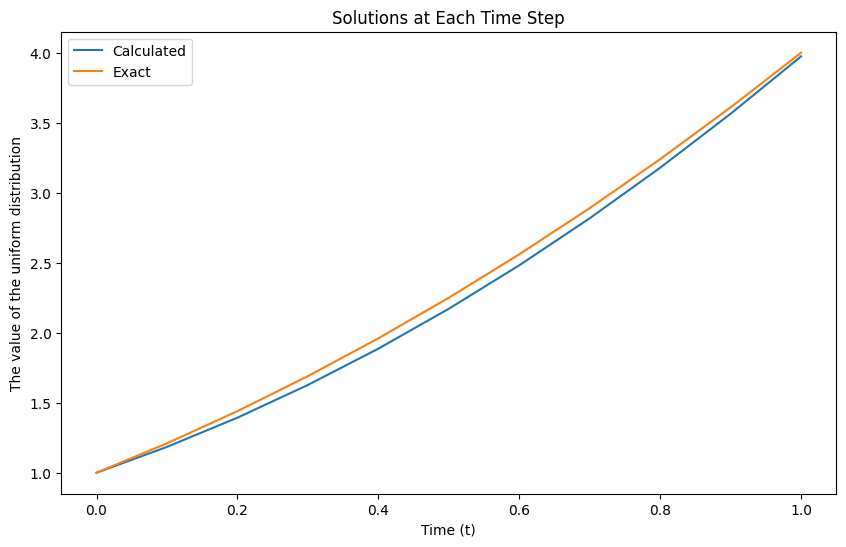

In [21]:
T = 10
N = 10
p1 = torch.ones(N)
p2 = 4*p1

wfr, p, v, z = dynamic_wfr_relaxed_grid(p1, p2, delta=1, rel=75, T=T, lr=1e-3)

print('WFR distance:', wfr)

# Convert the tensor to a NumPy array
data = p.numpy()

# Create the spatial grid
t = np.linspace(0, 1, T+1)  # Spatial points

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(t, p[:, 0], label = 'Calculated')
plt.plot(t, (t+1)**2, label = 'Exact')

plt.xlabel('Time (t)')
plt.ylabel('The value of the uniform distribution')
plt.title('Solutions at Each Time Step')
plt.legend()
plt.show()

353


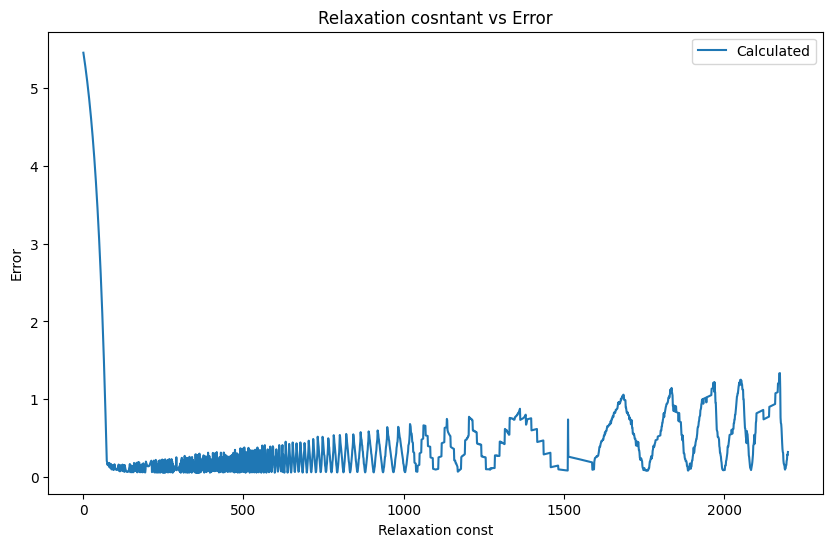

In [5]:
T = 10
N = 10
p1 = torch.ones(N)
p2 = 4*p1

rels = np.arange(1,2200, 1)
error = []

t = np.linspace(0, 1, T+1)
exact = (t+1)**2

for rel in rels:
    wfr, p, v, z = dynamic_wfr_relaxed_grid(p1, p2, delta=1, rel=rel, T=T, lr=1e-3)
    error.append(np.linalg.norm(p[:, 0]-exact))

min_ind = np.argmin(error)
print(rels[min_ind])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(rels, error, label = 'Calculated')

plt.xlabel('Relaxation const')
plt.ylabel('Error')
plt.title('Relaxation cosntant vs Error')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


174


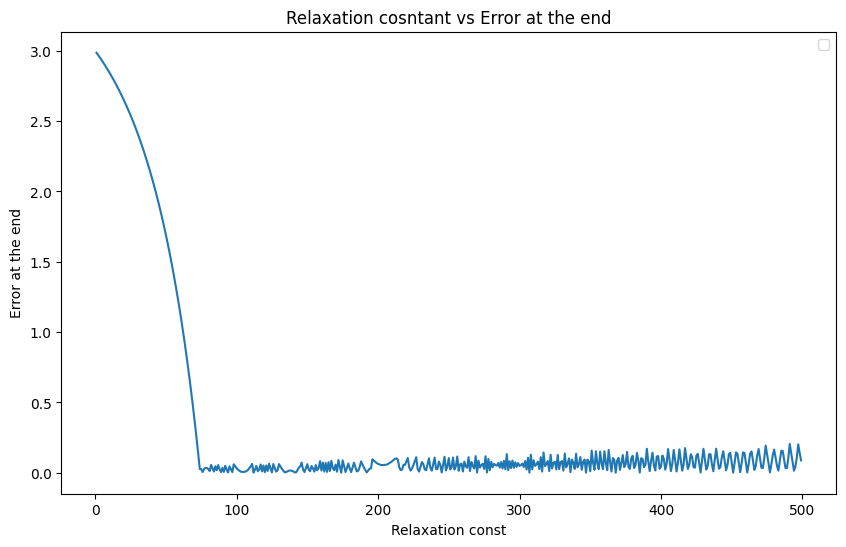

In [3]:
T = 10
N = 10
p1 = torch.ones(N)
p2 = 4*p1

rels = np.arange(1,500, 1)
error = []

t = np.linspace(0, 1, T+1)
exact = (t+1)**2

for rel in rels:
    wfr, p, v, z = dynamic_wfr_relaxed_grid(p1, p2, delta=1, rel=rel, T=T, lr=1e-3)
    error.append(np.linalg.norm(p[-1, 0]-4))

min_ind = np.argmin(error)
print(rels[min_ind])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(rels, error)

plt.xlabel('Relaxation const')
plt.ylabel('Error at the end')
plt.title('Relaxation cosntant vs Error at the end')
plt.legend()
plt.show()

In [5]:
print([error])

[[2.9861794, 2.972064, 2.9576452, 2.942915, 2.9278643, 2.9124842, 2.8967662, 2.8806996, 2.8642745, 2.8474813, 2.830309, 2.8127463, 2.7947822, 2.7764049, 2.7576017, 2.738361, 2.7186685, 2.6985111, 2.6778746, 2.6567454, 2.6351075, 2.6129453, 2.5902436, 2.5669842, 2.5431507, 2.518725, 2.4936876, 2.46802, 2.4417021, 2.414713, 2.3870304, 2.358632, 2.3294952, 2.2995949, 2.268906, 2.2374034, 2.2050583, 2.171844, 2.1377306, 2.1026862, 2.0666811, 2.0296812, 1.991652, 1.952559, 1.9123638, 1.871028, 1.8285112, 1.7847722, 1.7397656, 1.6934471, 1.6457691, 1.5966818, 1.5461338, 1.4940705, 1.4404371, 1.3851736, 1.3282194, 1.2695105, 1.2089789, 1.1465578, 1.0821707, 1.0157447, 0.94719696, 0.8764458, 0.80340457, 0.7279794, 0.6500788, 0.5695982, 0.4864359, 0.40047812, 0.31161547, 0.21972132, 0.12467098, 0.02633071, 0.026254654, 0.005230665, 0.025793552, 0.034327745, 0.0341053, 0.025866985, 0.011870623, 0.05538869, 0.032610416, 0.008558273, 0.046238184, 0.017979145, 0.05437994, 0.02523446, 0.0044379234, 